In [1]:
import matplotlib.pyplot as plt
from module.for_dataset.create_dataset import create_dataset
from module.for_model.training import construct_and_train_model
from module.for_dataset.normalization import normalization
from module.for_model.checkpoint import save_checkpoint

# Construct dataset

In [2]:
X_train, Y_train, X_test, Y_test  = create_dataset(0,20000, "xor")

# 原本數值介於 +-2 之間而已，所以就不用 normalize 了
# 跑了一遍之後發現好像還是需要限縮到 0~1

In [3]:
for x, y , idx in zip(X_train[:5], Y_train[:5], range(len(Y_train))):
    print(f"{idx}\tx = {x},\tY = {y}")

0	x = [1.05847943e+00 6.32556461e-04],	Y = 1
1	x = [ 1.13383334 -0.11858177],	Y = 1
2	x = [ 0.96636156 -0.04787412],	Y = 1
3	x = [1.06442637 0.96180804],	Y = 0
4	x = [0.17456393 0.92070716],	Y = 1


### Preprocess

#### 觀察資料
發現 X 值
1. 有正有負
2. 明顯以 0.5 為中心，分隔開來的兩堆資料 (Y也是)

In [4]:
X_train.shape

(16000, 2)

(array([[1223., 1070., 1147., 1155., 1127., 1120., 1122.,    0.,    0.,
            0.,    0.,    0.,    0., 1159., 1106., 1155., 1182., 1135.,
         1177., 1122.],
        [1143., 1183., 1126., 1123., 1069., 1206., 1137.,    0.,    0.,
            0.,    0.,    0.,    0., 1138., 1206., 1138., 1168., 1091.,
         1137., 1135.]]),
 array([-9.99949285e-01, -8.99953246e-01, -7.99957208e-01, -6.99961169e-01,
        -5.99965130e-01, -4.99969091e-01, -3.99973052e-01, -2.99977014e-01,
        -1.99980975e-01, -9.99849359e-02,  1.11029211e-05,  1.00007142e-01,
         2.00003181e-01,  2.99999219e-01,  3.99995258e-01,  4.99991297e-01,
         5.99987336e-01,  6.99983375e-01,  7.99979413e-01,  8.99975452e-01,
         9.99971491e-01]),
 <a list of 2 BarContainer objects>)

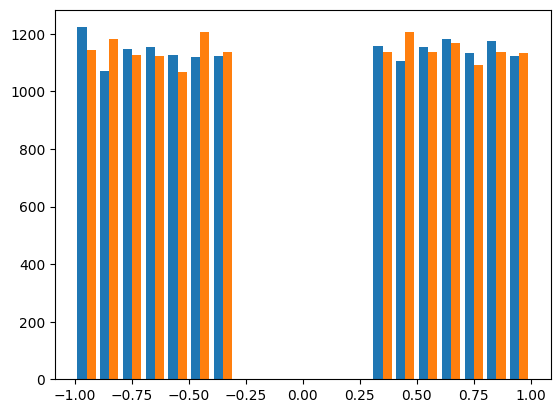

In [5]:
plt.hist(X_train - 0.5, bins=20)

(array([[287., 306., 263., 305., 292., 268., 321.,   0.,   0.,   0.,   0.,
           0.,   0., 270., 307., 273., 272., 270., 293., 273.],
        [291., 261., 272., 304., 268., 300., 267.,   0.,   0.,   0.,   0.,
           0.,   0., 295., 288., 292., 285., 318., 278., 281.]]),
 array([-4.99601268e-01, -3.99648549e-01, -2.99695830e-01, -1.99743112e-01,
        -9.97903932e-02,  1.62325508e-04,  1.00115044e-01,  2.00067763e-01,
         3.00020481e-01,  3.99973200e-01,  4.99925919e-01,  5.99878637e-01,
         6.99831356e-01,  7.99784075e-01,  8.99736793e-01,  9.99689512e-01,
         1.09964223e+00,  1.19959495e+00,  1.29954767e+00,  1.39950039e+00,
         1.49945311e+00]),
 <a list of 2 BarContainer objects>)

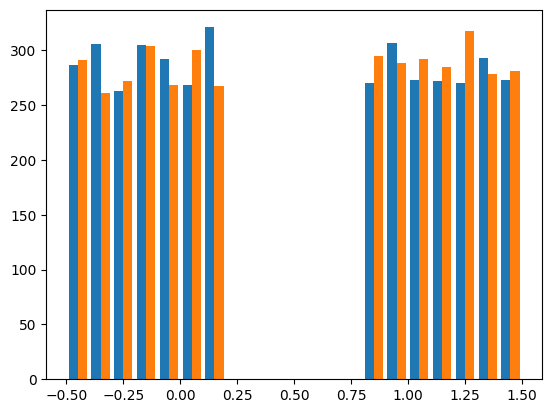

In [6]:
plt.hist(X_test, bins=20)

(array([8071.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7929.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

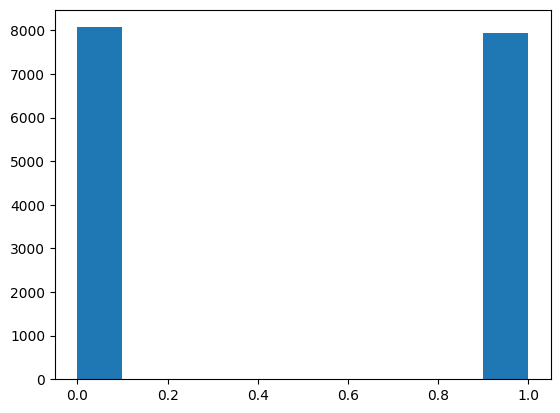

In [7]:
plt.hist(Y_train)

(array([1987.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2013.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

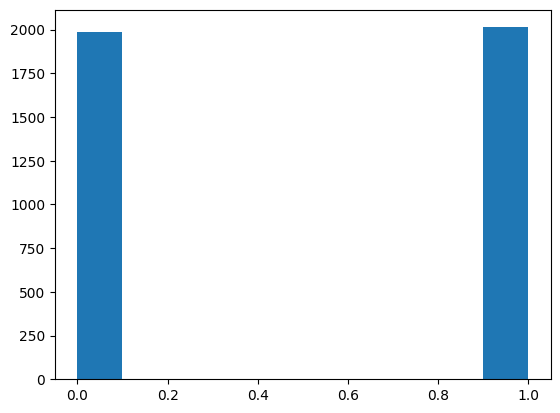

In [8]:
plt.hist(Y_test)

#### 平移+正規化

In [9]:
# reshape for the model output
# 因為計算 backprobagetion 時矩陣相乘的問題，所以需轉換
# 但 shape = (1,) 者無法透過 .T 轉置，所以必須 reshape
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

In [10]:
normalizer = normalization(X_train-0.5)
X_train_n = normalizer.normalize(X_train-0.5)
Y_train_n = normalizer.normalize(Y_train-0.5)
X_test_n = normalizer.normalize(X_test-0.5)
Y_test_n = normalizer.normalize(Y_test-0.5)

(array([[1223., 1070., 1147., 1155., 1127., 1120., 1122.,    0.,    0.,
            0.,    0.,    0.,    0., 1159., 1106., 1155., 1182., 1135.,
         1177., 1122.],
        [1143., 1183., 1126., 1123., 1069., 1206., 1137.,    0.,    0.,
            0.,    0.,    0.,    0., 1138., 1206., 1138., 1168., 1091.,
         1137., 1135.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

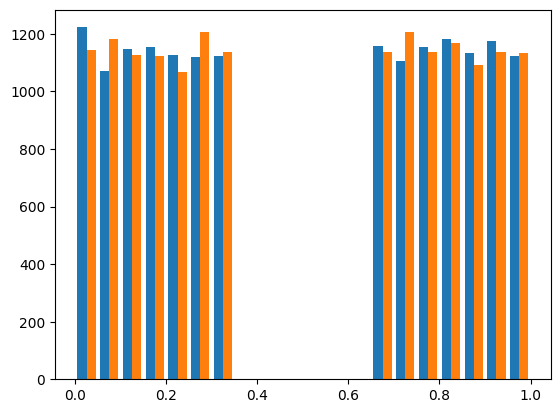

In [11]:
plt.hist(normalizer.normalize(X_train-0.5), bins=20)

In [12]:
data = [X_train_n, Y_train_n, X_test_n, Y_test_n]

In [13]:
# 為了之後畫動畫
data_2_save = [X_train_n, Y_train.flatten(), X_test_n, Y_test.flatten()]
import pickle
path_folder = "data\\xor_normalized"
path_loss = f"{path_folder}\\2024_0608_0010_part3.pkl"
with open(path_loss, 'wb') as f:
    pickle.dump(data_2_save, f)

# Train and Record

In [14]:
name_experiment = "2024_0608_0010_part3"
n = 2

folder_node = f"node_{n:02d}"
path_folder = f"checkpoints\\{name_experiment}\\{folder_node}"

loss_n = []
param_n = []
# 用 30 個不同的 randam seed 訓練 30 個不同的模型
for layer_initializer in range(5):
    print(f"\tlayer_initializer = {layer_initializer}")    

    ttl_loss, ttl_param = \
        construct_and_train_model(
            n = n,
            layer_initializer = layer_initializer,
            data = data,
            epoch_cycle = 1
        )
    loss_n.append(ttl_loss)
    param_n.append(ttl_param)

save_checkpoint(path_folder, loss_n, param_n)

	layer_initializer = 0
	layer_initializer = 1
	layer_initializer = 2
	layer_initializer = 3
	layer_initializer = 4


('checkpoints\\2024_0608_0010_part3\\node_02\\loss.pkl',
 'checkpoints\\2024_0608_0010_part3\\node_02\\param.pkl')